# Introduction

After the last dice experiment I got to thinking about six-sided dice (AKA d6). I wanted to make an in-world dice game for my D&D setting. I thought that skewing a d6's distribution from `[1, 2, 3, 4, 5, 6]` to `[1, 1, 1, 2, 2, 3]` (still 6-sided just with different numbers) could produce interesting results for gambling, and it did!

This notebook visualizes the **distributions of rolling these slanted d6's.**

# Packages

In [3]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Dice Functions

In [4]:
def slant_6(dice=1):
    '''
    Returns sum of random roll(s) from n-slanted-d6.
    ---
    dice
        Number of dice rolled. Defaults to one.
    '''
    slant_dist = [1, 1, 1, 2, 2, 3]
    total = 0
    for i in range(dice):
        total += np.random.choice(slant_dist)
    return total

In [5]:
def slant_6_dist(dice=1, rolls=1000000):
    '''
    Returns list of individual rolls for n-slanted-d6.
    ---
    dice
        Number of dice rolled. Defaults to one.
    rolls
        Number of total rolls done with die/dice.
    '''
    roll_dist = []
    for i in range(rolls):
        roll_dist.append(slant_6(dice))
    return roll_dist

In [6]:
def slant_6_plot(dice=1, color='red'):
    '''
    Creates a Seaborn distplot for the given set of slant-d6's to be rolled.
    ---
    dice
        Number of dice rolled. Defaults to one.
    color
        Color of the plot. Defaults to red.
    '''
    plt.figure(figsize=(12,6))
    sns.distplot(slant_6_dist(dice=dice), color=color, bins='auto')
    plt.title(f'Distribution For {dice} Slant d6')
    plt.ylabel('Likelihood')
    plt.xlabel('Roll')
    plt.show();

# Visualizations

In [9]:
slant_6_dict = {1: 'red', 2: 'orange', 3: 'yellow', 4: 'green', 5: 'blue', 6: 'purple'}

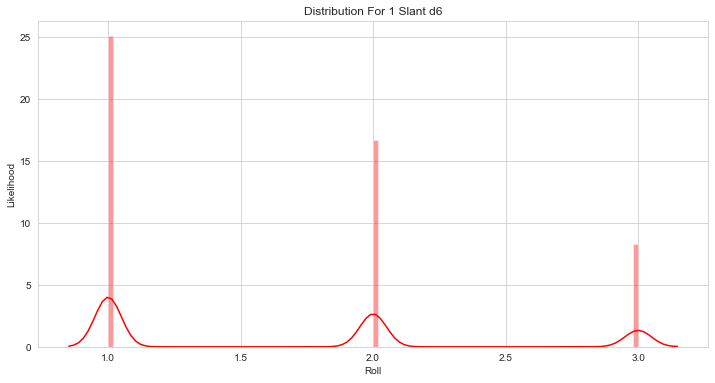

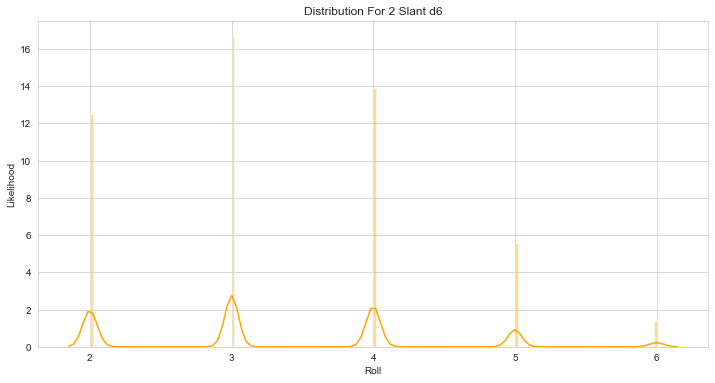

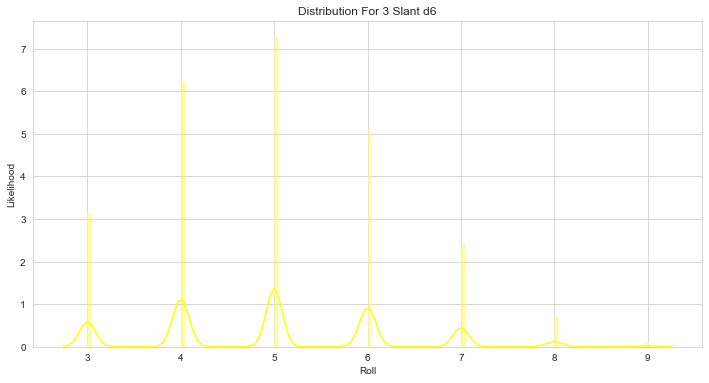

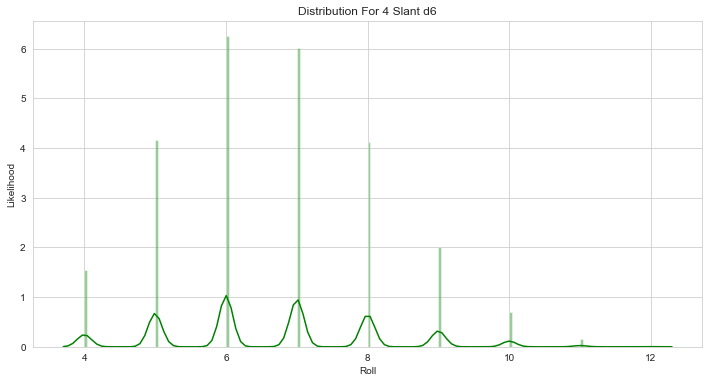

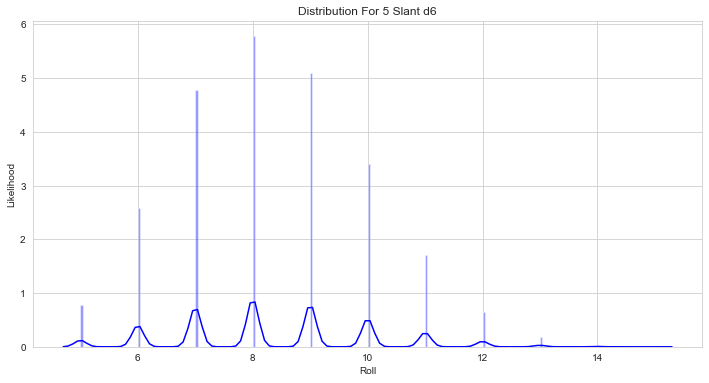

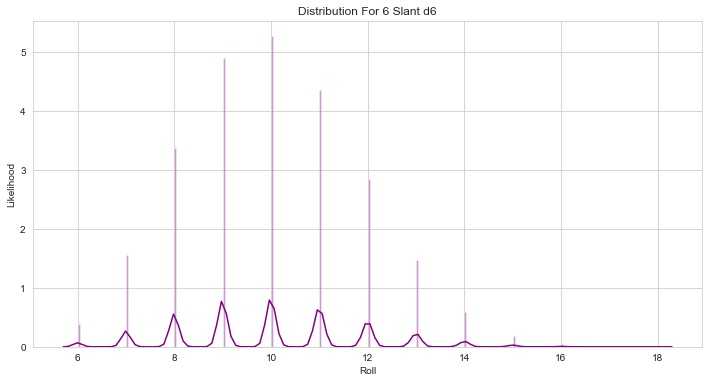

In [10]:
for i, j in slant_6_dict.items():
    slant_6_plot(dice=i, color=j)

# Frequencies

I made two of the `[1, 1, 1, 2, 2, 3]` dice by hand-carving them and, honestly, I'm not making more. Since that's the practical frame for the most dice we could use in-game for anything, we should look at the distributions for total outputs on those dice rolls. In other words: **"If ya only got two, what're the odds lookin like?"**

This first cell shows the possible combinations:

In [51]:
slant_6 = [1, 1, 1, 2, 2, 3]
output_list = []

for i in slant_6:
    for j in slant_6:
        output_list.append(i+j)

set(output_list)

{2, 3, 4, 5, 6}

This next cell shows their frequencies in percentage chance:

In [52]:
output_freq = {}

for i in set(output_list):
    output_freq[i] = np.round(len([x for x in output_list if x == i])/len(output_list), 2)

print(output_freq)

{2: 0.25, 3: 0.33, 4: 0.28, 5: 0.11, 6: 0.03}


The fact that 2 is **third-most** common is a little surprising here. Going in we mostly have 1's on our dice, so "common sense" suggests that 2 then should be the **most** common output, since we're likely to get two 1's. But, we'd be wrong to think this.

I don't know exactly how you'd use this in-game, but I think the fact that it's somewhat counterintuitive plays in nicely to gambling and trickery. Happy gaming!

# Appendix

Okay I ran it with three dice too I couldn't resist.

In [53]:
output_list_2 = []

for i in slant_6:
    for j in slant_6:
        for k in slant_6:
            output_list_2.append(i+j+k)

set(output_list_2)

{3, 4, 5, 6, 7, 8, 9}

In [55]:
output_freq_2 = {}

for i in set(output_list_2):
    output_freq_2[i] = np.round(len([x for x in output_list_2 if x == i])/len(output_list_2), 3)

print(output_freq_2)

{3: 0.125, 4: 0.25, 5: 0.292, 6: 0.204, 7: 0.097, 8: 0.028, 9: 0.005}


Could I have made a function? Yes. Should I have done this before instead of simulating millions of dice rolls? Absolutely. So goes the process of learning ¯\\_(ツ)_/¯